In [32]:
import os
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from pprint import pprint

import matplotlib.pyplot as plt
import seaborn as sns

np.random.seed(0)
pd.set_option('display.max_rows', 80)
%matplotlib inline

In [12]:
path = "../data/linear/hello.csv"
df = pd.read_csv(path)
df.head()

,Params,Inputs,Precision,Bias,Input Size,Output Size,Kernel Name,Context,Stream,Block Size,...,SM Busy (%),SM Frequency (cycle/usecond),Shared Memory Configuration Size (Kbyte),Static Shared Memory Per Block (byte/block),Theoretical Active Warps per SM (warp),Theoretical Occupancy (%),Threads (thread),Warp Cycles Per Executed Instruction (cycle),Warp Cycles Per Issued Instruction (cycle),Latency (ms)
0,1.161.0.1.1,1,161,0,1,1,"std::enable_if<!T7, void>::type internal::gemv...",1,7,"(32, 4, 1)",...,4.43,1150.0,16.38,0.0,12.0,18.75,128.0,20.52,17.92,0.109056
1,1.161.0.1.2,1,161,0,1,2,"void gemmk1_kernel<int, float, (int)256, (int)...",1,7,"(256, 1, 1)",...,5.42,1230.0,32.77,1020.0,64.0,100.00,256.0,35.35,29.28,0.109568
2,1.161.0.1.4,1,161,0,1,4,"void gemmk1_kernel<int, float, (int)256, (int)...",1,7,"(256, 1, 1)",...,5.42,1210.0,32.77,1020.0,64.0,100.00,256.0,35.53,29.43,0.108032
3,1.161.0.1.8,1,161,0,1,8,"void gemmk1_kernel<int, float, (int)256, (int)...",1,7,"(256, 1, 1)",...,5.20,1210.0,32.77,1020.0,64.0,100.00,256.0,35.41,29.32,0.108032
4,1.161.0.1.12,1,161,0,1,12,"void gemmk1_kernel<int, float, (int)256, (int)...",1,7,"(256, 1, 1)",...,5.40,1260.0,32.77,1020.0,64.0,100.00,256.0,35.34,29.26,0.109568


In [60]:
def get_fc_flops(row):
    return row['Inputs'] * (2 * row['Input Size'] + 1) * row['Output Size'] / (10**3)

df['kFLOPs'] = df.apply(get_fc_flops, axis=1)

In [89]:
to_drop = {"Params", "Kernel Name", "Context", "Stream", "Block Size", "Grid Size", "Device", "CC", "Function Cache Configuration"}
y_cols = {"Latency (ms)"}
# y_cols = {"Duration (usecond)"}
columns = set(df.columns)
X_cols = sorted(columns - to_drop - y_cols)

# for col in to_drop:
#     print(df[col].unique())

# for col in X_cols:
#     print(df[col][0])

In [107]:
X, y = df[list(X_cols)], df['Latency (ms)']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
train_df = pd.concat([X_train, y_train], axis=1)
test_df = pd.concat([X_train, y_train], axis=1)

In [108]:
train_df.head()
# X_train.head()
# y_train.head()

,Achieved Active Warps Per SM (warp),Achieved Occupancy (%),Active Warps Per Scheduler (warp),Avg. Active Threads Per Warp,Avg. Divergent Branches,Avg. Executed Instructions Per Scheduler (inst),Avg. Issued Instructions Per Scheduler (inst),Avg. Not Predicated Off Threads Per Warp,Bias,Block Limit Registers (block),...,Shared Memory Configuration Size (Kbyte),Static Shared Memory Per Block (byte/block),Theoretical Active Warps per SM (warp),Theoretical Occupancy (%),Threads (thread),Warp Cycles Per Executed Instruction (cycle),Warp Cycles Per Issued Instruction (cycle),Waves Per SM,kFLOPs,Latency (ms)
13971,3.72,5.81,1.00,26.26,0.00,2.63,2.75,24.77,0,3.0,...,16.38,0.0,12.0,18.75,128.0,24.57,23.51,0.00,5.648,0.095744
9219,3.61,5.64,1.12,18.65,0.29,63.15,71.65,14.38,1,21.0,...,65.54,768.0,64.0,100.00,15872.0,35.84,31.59,0.07,61.628,0.098304
19346,3.99,6.24,1.00,28.30,0.00,43.89,45.97,23.75,1,3.0,...,16.38,0.0,12.0,18.75,1920.0,10.75,10.26,0.05,38.520,0.095232
3895,3.99,6.24,1.00,28.39,0.00,93.00,97.31,25.53,0,3.0,...,16.38,0.0,12.0,18.75,3968.0,12.18,11.64,0.10,135.160,0.095232
12191,3.48,5.43,1.00,30.77,0.00,1.17,1.29,27.61,0,3.0,...,16.38,0.0,12.0,18.75,128.0,27.12,24.64,0.00,2.064,0.096768


In [109]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25907 entries, 13971 to 2732
Data columns (total 64 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   Achieved Active Warps Per SM (warp)              25907 non-null  float64
 1   Achieved Occupancy (%)                           25907 non-null  float64
 2   Active Warps Per Scheduler (warp)                25907 non-null  float64
 3   Avg. Active Threads Per Warp                     25907 non-null  float64
 4   Avg. Divergent Branches                          25907 non-null  float64
 5   Avg. Executed Instructions Per Scheduler (inst)  25907 non-null  float64
 6   Avg. Issued Instructions Per Scheduler (inst)    25907 non-null  float64
 7   Avg. Not Predicated Off Threads Per Warp         25907 non-null  float64
 8   Bias                                             25907 non-null  int64  
 9   Block Limit Registers (block) 

In [110]:
train_df.describe()

,Achieved Active Warps Per SM (warp),Achieved Occupancy (%),Active Warps Per Scheduler (warp),Avg. Active Threads Per Warp,Avg. Divergent Branches,Avg. Executed Instructions Per Scheduler (inst),Avg. Issued Instructions Per Scheduler (inst),Avg. Not Predicated Off Threads Per Warp,Bias,Block Limit Registers (block),...,Shared Memory Configuration Size (Kbyte),Static Shared Memory Per Block (byte/block),Theoretical Active Warps per SM (warp),Theoretical Occupancy (%),Threads (thread),Warp Cycles Per Executed Instruction (cycle),Warp Cycles Per Issued Instruction (cycle),Waves Per SM,kFLOPs,Latency (ms)
count,25907.000000,25907.000000,25907.000000,25907.000000,25907.000000,25907.000000,25907.000000,25907.000000,25907.000000,25907.000000,...,25907.000000,25907.000000,25907.000000,25907.000000,25907.000000,25907.000000,25907.000000,25907.000000,25907.000000,25907.000000
mean,4.897209,7.653666,1.261132,25.914635,0.302644,128.879977,138.631440,21.964588,0.500984,5.818312,...,26.223645,195.898251,22.361833,34.940364,9805.717991,17.396225,15.984210,0.127005,102.123902,0.097622
std,3.440412,5.375221,0.864757,4.503232,0.649930,182.021451,195.586146,4.290017,0.500009,5.848851,...,19.459511,493.117442,20.288033,31.700051,20314.423350,7.799276,6.510349,0.171487,187.823676,0.003241
min,2.960000,4.620000,1.000000,4.440000,0.000000,0.500000,0.570000,3.490000,0.000000,1.000000,...,8.190000,0.000000,12.000000,18.750000,128.000000,7.720000,7.430000,0.000000,0.003000,0.091648
25%,3.960000,6.190000,1.000000,24.460000,0.000000,18.800000,20.230000,20.440000,0.000000,3.000000,...,16.380000,0.000000,12.000000,18.750000,1152.000000,12.670000,12.060000,0.020000,11.296000,0.095744
50%,3.990000,6.240000,1.000000,27.040000,0.010000,63.330000,68.940000,22.420000,1.000000,3.000000,...,16.380000,0.000000,12.000000,18.750000,3840.000000,14.480000,13.570000,0.070000,39.144000,0.096768
75%,4.000000,6.240000,1.000000,28.700000,0.280000,156.850000,169.660000,24.740000,1.000000,3.000000,...,16.380000,0.000000,12.000000,18.750000,10752.000000,19.700000,17.940000,0.140000,107.680000,0.098304
max,39.640000,61.940000,9.820000,31.830000,6.220000,1451.850000,1567.440000,31.550000,1.000000,21.000000,...,65.540000,2560.000000,64.000000,100.000000,229376.000000,56.160000,52.330000,1.040000,2098.176000,0.120832


<AxesSubplot:>

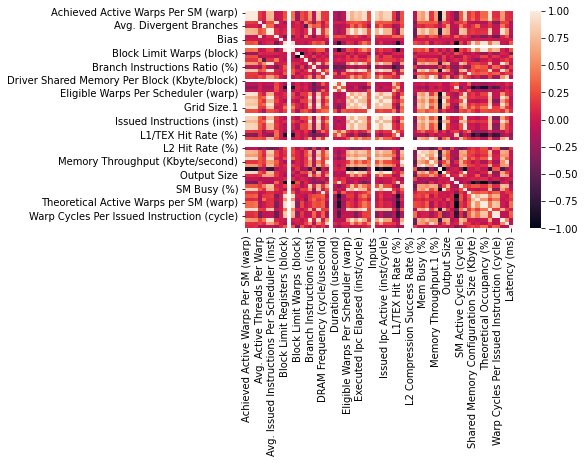

In [111]:
sns.heatmap(train_df.corr())

array([[<AxesSubplot:title={'center':'Achieved Active Warps Per SM (warp)'}>,
        <AxesSubplot:title={'center':'Achieved Occupancy (%)'}>,
        <AxesSubplot:title={'center':'Active Warps Per Scheduler (warp)'}>,
        <AxesSubplot:title={'center':'Avg. Active Threads Per Warp'}>,
        <AxesSubplot:title={'center':'Avg. Divergent Branches'}>,
        <AxesSubplot:title={'center':'Avg. Executed Instructions Per Scheduler (inst)'}>,
        <AxesSubplot:title={'center':'Avg. Issued Instructions Per Scheduler (inst)'}>,
        <AxesSubplot:title={'center':'Avg. Not Predicated Off Threads Per Warp'}>],
       [<AxesSubplot:title={'center':'Bias'}>,
        <AxesSubplot:title={'center':'Block Limit Registers (block)'}>,
        <AxesSubplot:title={'center':'Block Limit SM (block)'}>,
        <AxesSubplot:title={'center':'Block Limit Shared Mem (block)'}>,
        <AxesSubplot:title={'center':'Block Limit Warps (block)'}>,
        <AxesSubplot:title={'center':'Block Size.1'}>,
  

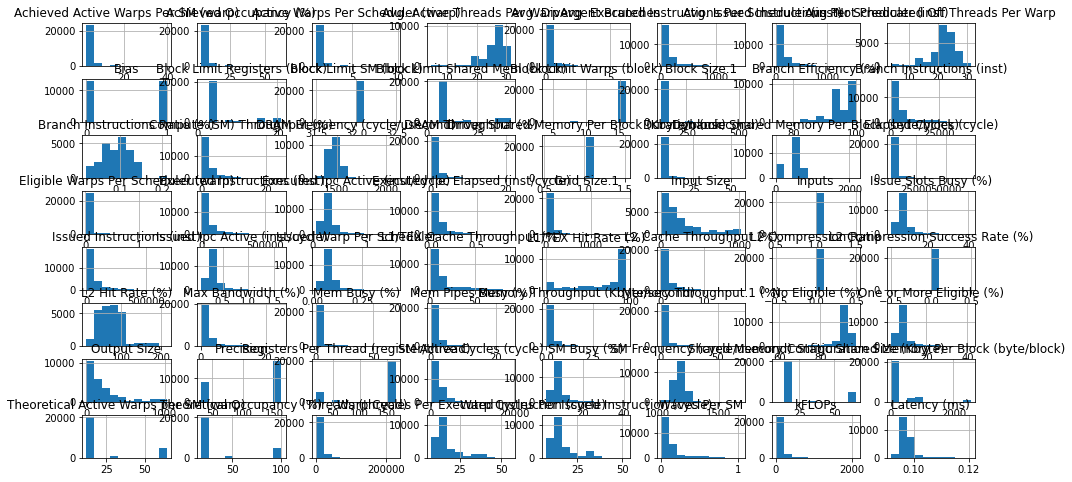

In [112]:
train_df.hist(figsize=(16, 8))

In [113]:
X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)
model = sm.OLS(y_train, X_train).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           Latency (ms)   R-squared:                       0.475
Model:                            OLS   Adj. R-squared:                  0.474
Method:                 Least Squares   F-statistic:                     417.6
Date:                Fri, 22 Mar 2024   Prob (F-statistic):               0.00
Time:                        17:40:39   Log-Likelihood:             1.2009e+05
No. Observations:               25907   AIC:                        -2.401e+05
Df Residuals:                   25850   BIC:                        -2.396e+05
Df Model:                          56                                         
Covariance Type:            nonrobust                                         
                                                      coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------

Train r2:  0.47498336861733115
Validation r2:  0.4911118416303468
(25907,) (25907,)


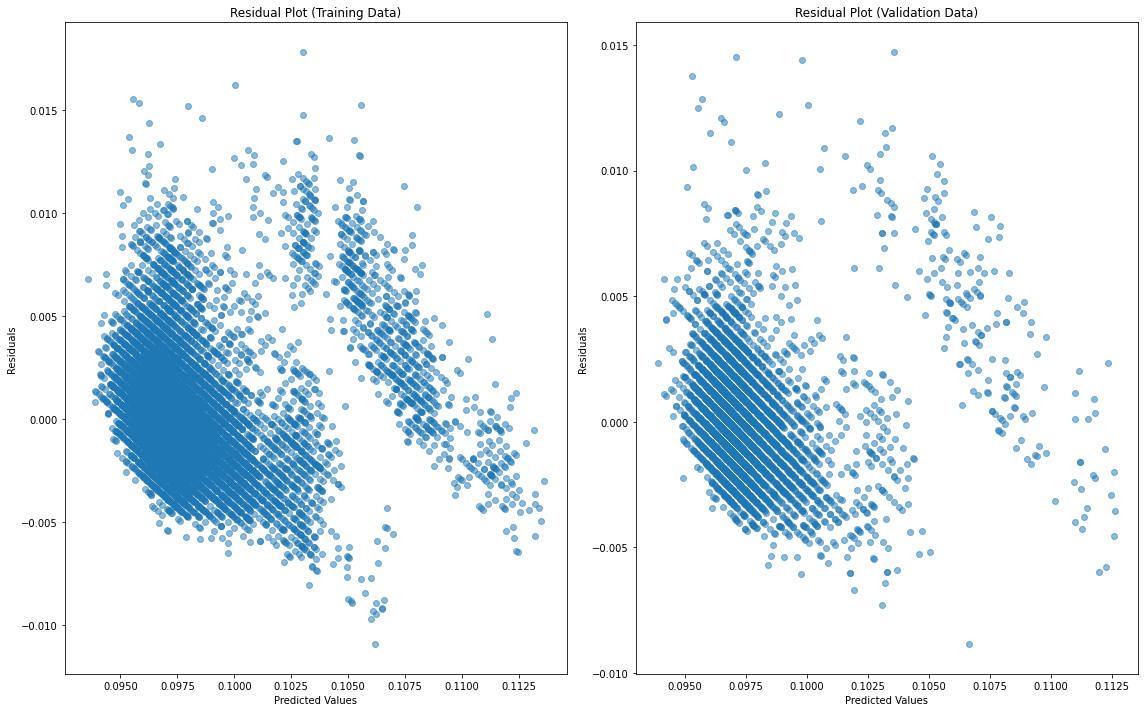

In [125]:
y_pred = model.predict(X_train)
y_pred_val = model.predict(X_test)

print('Train r2: ', r2_score(y_train, y_pred))
print('Validation r2: ', r2_score(y_test, y_pred_val))

residuals_train = y_train - y_pred
residuals_val = y_test - y_pred_val

print(y_pred.shape, residuals_train.shape)

# Plot residual graph for training data
plt.figure(figsize=(16, 10))
plt.subplot(1, 2, 1)
plt.scatter(y_pred, residuals_train, alpha=0.5)
plt.title('Residual Plot (Training Data)')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')

# Plot residual graph for validation data
plt.subplot(1, 2, 2)
plt.scatter(y_pred_val, residuals_val, alpha=0.5)
plt.title('Residual Plot (Validation Data)')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')

plt.tight_layout()
plt.show()

In [115]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
print(y_pred.shape)
print(y_pred_val.shape)

(25907, 63)
(6477, 63)
(25907,)
(6477,)
(25907,)
(6477,)


Text(0, 0.5, 'Duration')

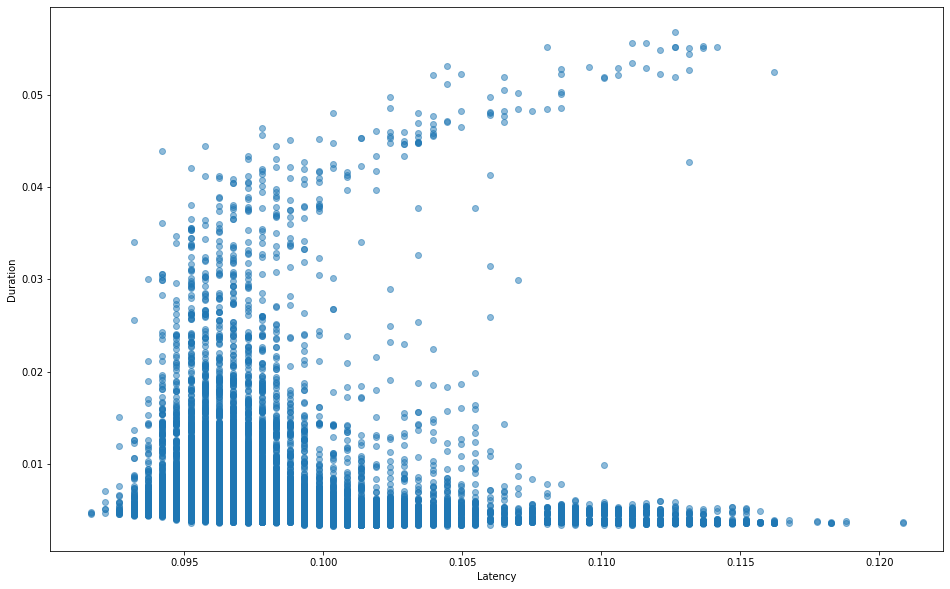

In [120]:
latency, runtime = df['Latency (ms)'], df['Duration (usecond)'] / 1000.0
plt.figure(figsize=(16, 10))
plt.scatter(latency, runtime, alpha=0.5)
plt.xlabel('Latency')
plt.ylabel('Duration')

Text(0, 0.5, 'Latency')

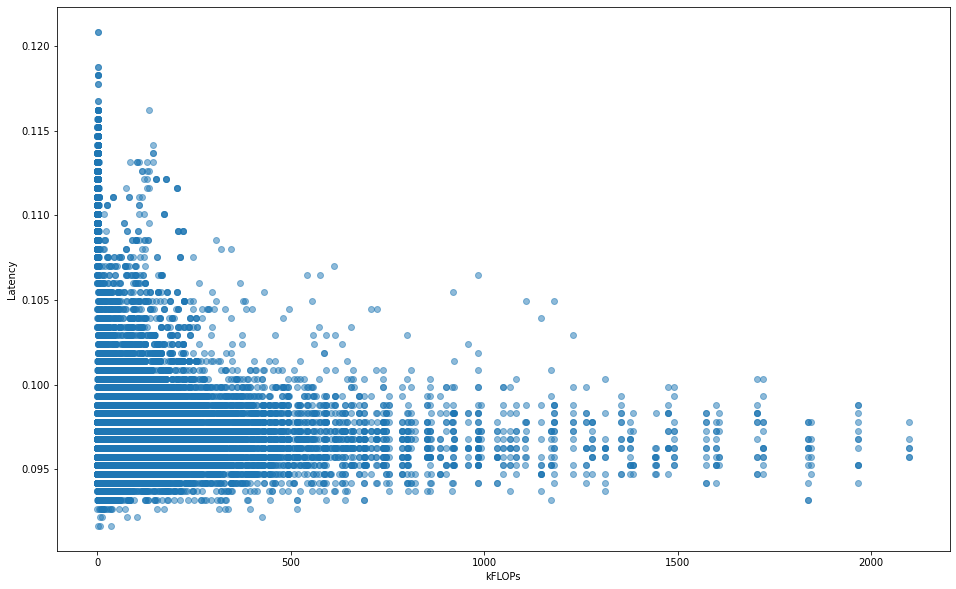

In [121]:
latency, flops = df['Latency (ms)'], df['kFLOPs']
plt.figure(figsize=(16, 10))
plt.scatter(flops, latency, alpha=0.5)
plt.xlabel('kFLOPs')
plt.ylabel('Latency')

Text(0, 0.5, 'Duration')

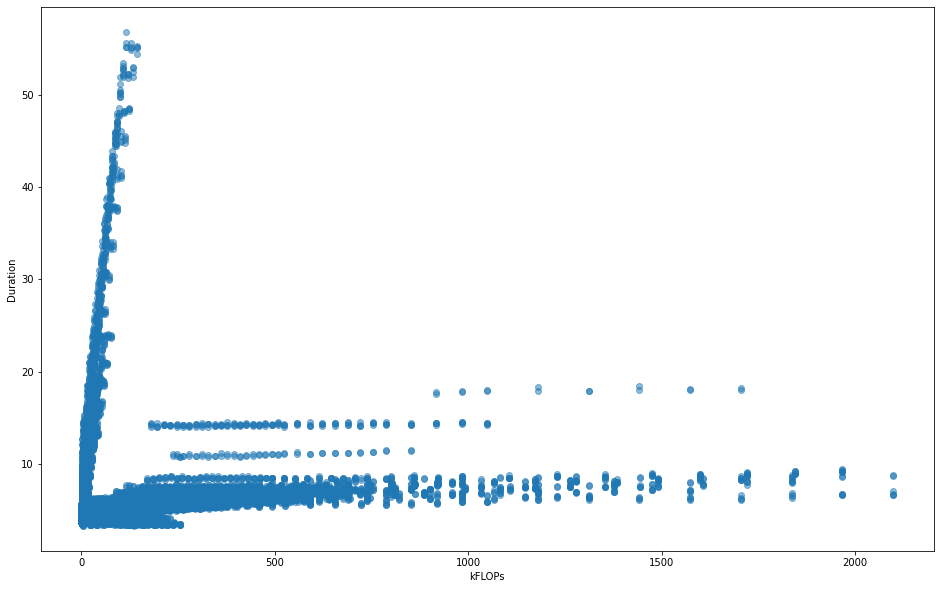

In [123]:
runtime, flops = df['Duration (usecond)'], df['kFLOPs']
plt.figure(figsize=(16, 10))
plt.scatter(flops, runtime, alpha=0.5)
plt.xlabel('kFLOPs')
plt.ylabel('Duration')